In [66]:
import pandas as pd
import numpy as np
# index_col=0은 인덱스를 자동으로 붙이지 말 것
data = pd.read_csv("./의료기관현황.csv", index_col=0, encoding="cp949", engine="python")

addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=('시도','군구'))


In [65]:
data.loc[data['심평원 요양기관번호'].duplicated(),:]    #중복확인

data.loc[data['심평원 요양기관번호'] == 34200509]

#요양기관 번호가 중복인 요양기관 번호만 set으로
set(data['심평원 요양기관번호'])

dub_num = data.loc[data['심평원 요양기관번호'].duplicated(),['심평원 요양기관번호']]
set(dub_num['심평원 요양기관번호'])

{31202268, 34200509}

In [67]:
#중복행 제거          subset=검사할 열 생략시 모든열(모든열이 같을때) inplace = 원본변경여부 (기본값-False)
data.drop_duplicates(subset='심평원 요양기관번호',inplace=True)
len(data)

220

In [68]:
data

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [69]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=('시도','군구'))
addr

#강원도를 강원특별자치도로 변경
addr.시도 = addr.시도.replace('강원도','강원특별자치도')
addr

,시도,군구
0,강원특별자치도,춘천시
1,강원특별자치도,삼척시
2,강원특별자치도,영월군
3,강원특별자치도,원주시
4,강원특별자치도,강릉시
...,...,...
215,충청북도,제천시
216,충청북도,충주시
217,충청북도,충주시
218,충청북도,영동군


In [70]:
o_addr = pd.read_excel("./행정구역별인구수.xlsx")
o_addr.rename(columns={'군별':"군구"},inplace=True)


In [71]:

for i in range(len(o_addr)):   #2-1.행정구역 주소모음 좌우 공백제거
    o_addr.시도[i]= o_addr.시도[i].strip() 
    o_addr.군구[i]= o_addr.군구[i].strip()
for i in range(len(addr)):    #2-2 병원 주소모음 좌우 공백제거
    addr.시도[i]= addr.시도[i].strip() 
    addr.군구[i]= addr.군구[i].strip()
#3.행정구역 시도+군구 합쳐서 시리즈 만들기
o_addr_series=o_addr.apply(lambda x: x.시도+' '+x.군구,axis=1)
#4.병원 주소도 시도+군구 합쳐서 시리지 만들기
sum_addr=addr.apply(lambda x: x.시도+' '+x.군구,axis=1)
#5.행정구역 시도+군구 합친거 비교위해 집합으로 만들기
city_do=list(o_addr_series.tolist())
#6.병원의 잘못된 시도+군구 확인
addr.loc[sum_addr.apply(lambda x : x not in city_do),:]


C:\Users\DongGyu\AppData\Local\Temp\ipykernel_2660\1847730277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_addr.시도[i]= o_addr.시도[i].strip()
C:\Users\DongGyu\AppData\Local\Temp\ipykernel_2660\1847730277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_addr.군구[i]= o_addr.군구[i].strip()
C:\Users\DongGyu\AppData\Local\Temp\ipykernel_2660\1847730277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_addr.시도[i]= o_addr.시도[i].

,시도,군구
22,경기,안산시
24,경남,통영시
25,경남,사천시
26,경남,사천시
27,창원시,의창구
28,경남,김해시
31,창원시,마산합포구3.15대로
47,경산시,경안로
49,경북,청도군
75,제주특별자치도,아란13길


In [81]:
print(set(addr.시도))
print(set(addr.군구))

{'전라북도', '경상북도', '광주광역시', '인천광역시', '창원시', '부산광역시', '경산시', '울산광역시', '경기도', '경상남도', '서울특별시', '대구광역시', '제주특별자치도', '충청남도', '대전광역시', '전라남도', '강원특별자치도', '천안시', '충청북도'}
{'통영시', '양평군', '울주군', '제천시', '동대문구', '서초구', '강릉시', '광산구', '영월군', '중랑구', '성동구', '서산시', '홍천군', '서천군', '여수시', '곡성군', '양산시', '서구', '보령시', '속초시', '문경시', '정읍시', '마산합포구3.15대로', '화성시', '진주시', '광양시', '진도군', '동작구', '옹진군', '청주시', '원주시', '거창군', '노원구', '아란13길', '안산시', '청도군', '수성구', '의령군', '나주시', '수원시', '울진군', '강진군', '이천시', '기장군', '달성군', '고령군', '경산시', '성남시', '춘천시', '전주시', '양주시', '영광군', '단양군', '영동군', '순천시', '충주시', '동두천시', '동구', '양구군', '김해시', '청원군', '고흥군', '안동시', '창녕군', '의정부시', '여주시', '장성군', '강남구', '시흥시', '연제구', '고창군', '경주시', '태백시', '보성군', '영주시', '목포시', '사천시', '창원시', '진안군', '포항시', '구미시', '사상구', '칠곡군', '부평구', '포천시', '계룡시', '신안군', '달서구', '동남구', '부안군', '울릉군', '김천시', '연수구', '동매로', '광진구', '무안군', '북구', '남원시', '강동구', '남해군', '삼척시', '파주시', '강북구', '대덕구', '송파구', '논산시', '계양구', '경안로', '고양시', '용인시', '종로구', '의창구', '남양주시', '중구', '동해시', '부천시', '공주시', '화순군', '

In [79]:
addr.시도 = addr.시도.replace('경북','경상북도')
addr.시도 = addr.시도.replace('경남','경상남도')
addr.시도 = addr.시도.replace('충남','충청남도')
addr.시도 = addr.시도.replace('충북','충청북도')
addr.시도 = addr.시도.replace('전남','전라남도')
addr.시도 = addr.시도.replace('전북','전라북도')
addr.시도 = addr.시도.replace('경기','경기도')
addr.시도 = addr.시도.replace('서울시','서울특별시')
addr.시도 = addr.시도.replace('부산특별시','부산광역시')
addr.시도 = addr.시도.replace('대전시','대전광역시')

In [84]:


sum_addr=addr.apply(lambda x: x.시도+' '+x.군구,axis=1)

addr.loc[sum_addr.apply(lambda x : x not in city_do),:]

,시도,군구


In [83]:
addr.iloc[27] = ['경상남도','창원시']
addr.iloc[31] = ['경상남도','창원시']
addr.iloc[47] = ['경상북도','경산시']
addr.iloc[75] = ['제주특별자치도','제주시']
addr.iloc[47] = ['경상북도','경산시']
addr.iloc[110] = ['충청북도','청주시']
addr.iloc[151] = ['부산광역시','사하구']
addr.iloc[202] = ['충청남도','천안시']
addr.iloc[203] = ['충청남도','천안시']

In [14]:
#addr.drop(['시도군구'],axis=1,inplace=True)

In [15]:
#addr['시도군구'] = addr.apply(lambda r:r['시도'] + ' ' + r['군구'], axis=1)

In [85]:
addr['개수'] = 0

In [86]:
addr = addr.groupby(['시도','군구'],as_index=False).count()
addr

,시도,군구,개수
0,강원특별자치도,강릉시,4
1,강원특별자치도,동해시,1
2,강원특별자치도,삼척시,1
3,강원특별자치도,속초시,1
4,강원특별자치도,양구군,1
...,...,...,...
134,충청북도,단양군,1
135,충청북도,영동군,1
136,충청북도,제천시,1
137,충청북도,청주시,5


In [87]:
addr['시도군구'] = addr.apply(lambda r:r['시도'] + ' ' + r['군구'], axis=1)

In [88]:
addr_group = addr.set_index("시도군구")
addr_group

,시도,군구,개수
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 단양군,충청북도,단양군,1
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1


In [89]:
population = o_addr.copy()


In [90]:
population['시도군구'] = population.apply(lambda r : r['시도'] + ' ' + r['군구'], axis=1)
population = population.set_index("시도군구")

In [91]:
addr_population_merge = pd.merge(addr_group, population, how='inner', left_index=True, right_index=True)
addr_population_merge

,시도_x,군구_x,개수,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209843,104014,105829
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88741,45102,43639
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62937,31967,30970
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82168,40667,41501
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,21179,11112,10067
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27737,14114,13623
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44353,22212,22141
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,130645,65707,64938


In [92]:

#병원한개당 인구수 -> 담당인구수
addr_population_merge['담당인구수'] = addr_population_merge['총인구수']/addr_population_merge['개수']
addr_population_merge


,시도_x,군구_x,개수,시도_y,군구_y,총인구수,남자인구수,여자인구수,담당인구수
시도군구,,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209843,104014,105829,52460.75
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88741,45102,43639,88741.00
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62937,31967,30970,62937.00
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82168,40667,41501,82168.00
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,21179,11112,10067,21179.00
...,...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27737,14114,13623,27737.00
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44353,22212,22141,44353.00
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,130645,65707,64938,130645.00


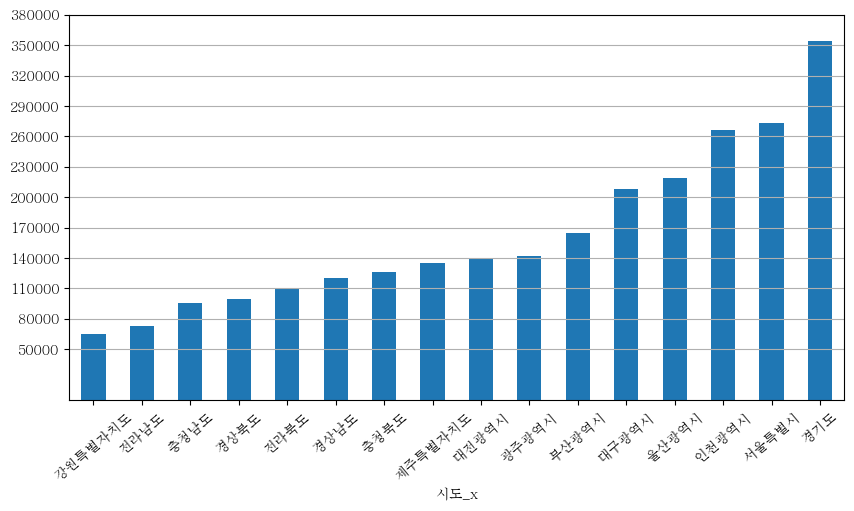

In [93]:
import matplotlib.pyplot as plt
#한글 처리를 위해
import matplotlib
matplotlib.rcParams['font.family']='batang'

hos_counter = addr_population_merge.groupby('시도_x')['개수'].sum()
pop_counter = addr_population_merge.groupby('시도_x')['총인구수'].sum()

df = pd.DataFrame({'개수':hos_counter,'총인구수':pop_counter})
df['담당인구수'] = df.총인구수 / df.개수
df['담당인구수'].sort_values().plot.bar(figsize = (10,5))
plt.grid(True, axis='y')
plt.yticks([i for i in range(50000,400000,30000)])
plt.xticks(rotation=40)
plt.show()

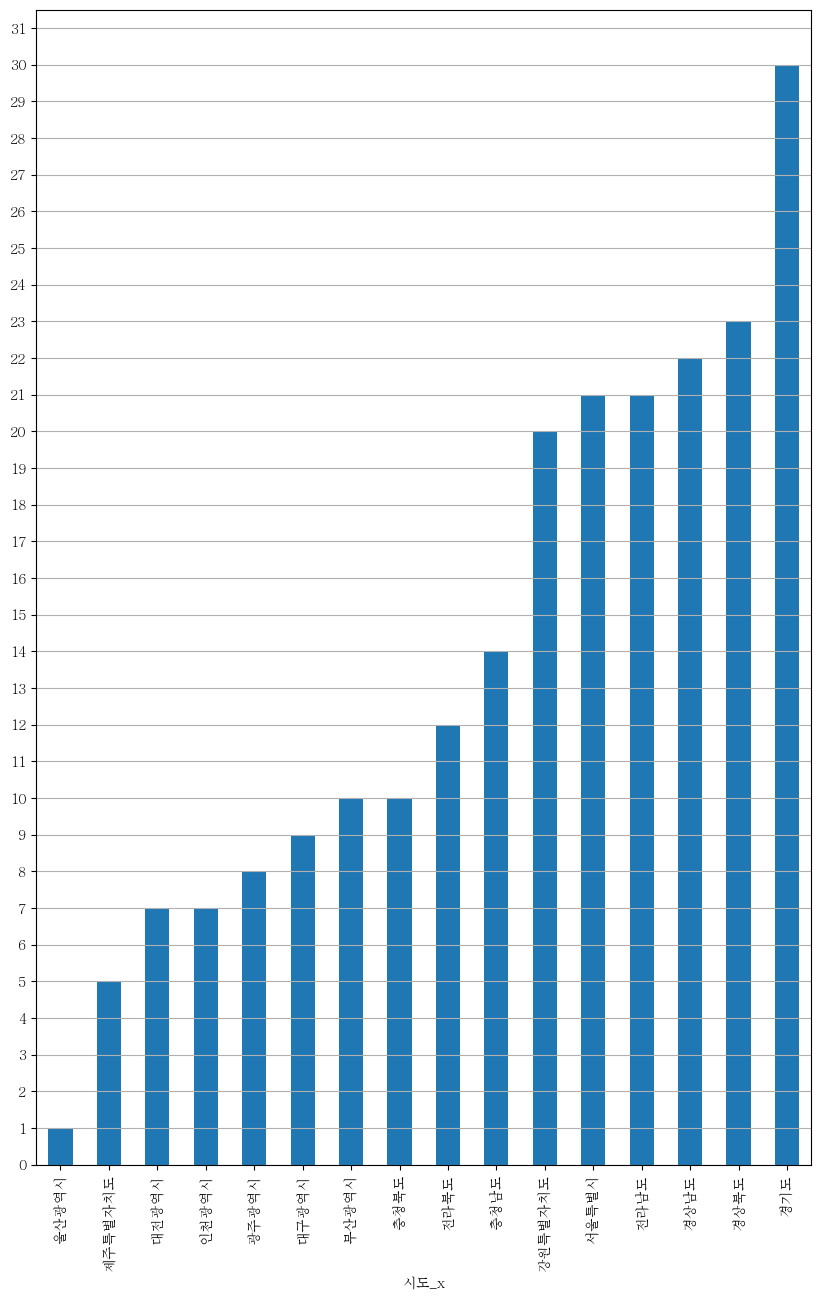

In [103]:
df['개수'].sort_values().plot.bar(figsize=(10,15))
plt.grid(True, axis='y')
plt.yticks([i for i in range(0,32,1)])
plt.show()

In [63]:
df

,개수,총인구수,담당인구수
시도_x,,,
강원특별자치도,20,1290758,64537.900000
경기도,28,10635199,379828.535714
경상남도,15,2012510,134167.333333
경상북도,20,2244866,112243.300000
광주광역시,8,1136890,142111.250000
대구광역시,9,1871171,207907.888889
대전광역시,7,977987,139712.428571
부산광역시,9,1644563,182729.222222
서울특별시,16,4777134,298570.875000


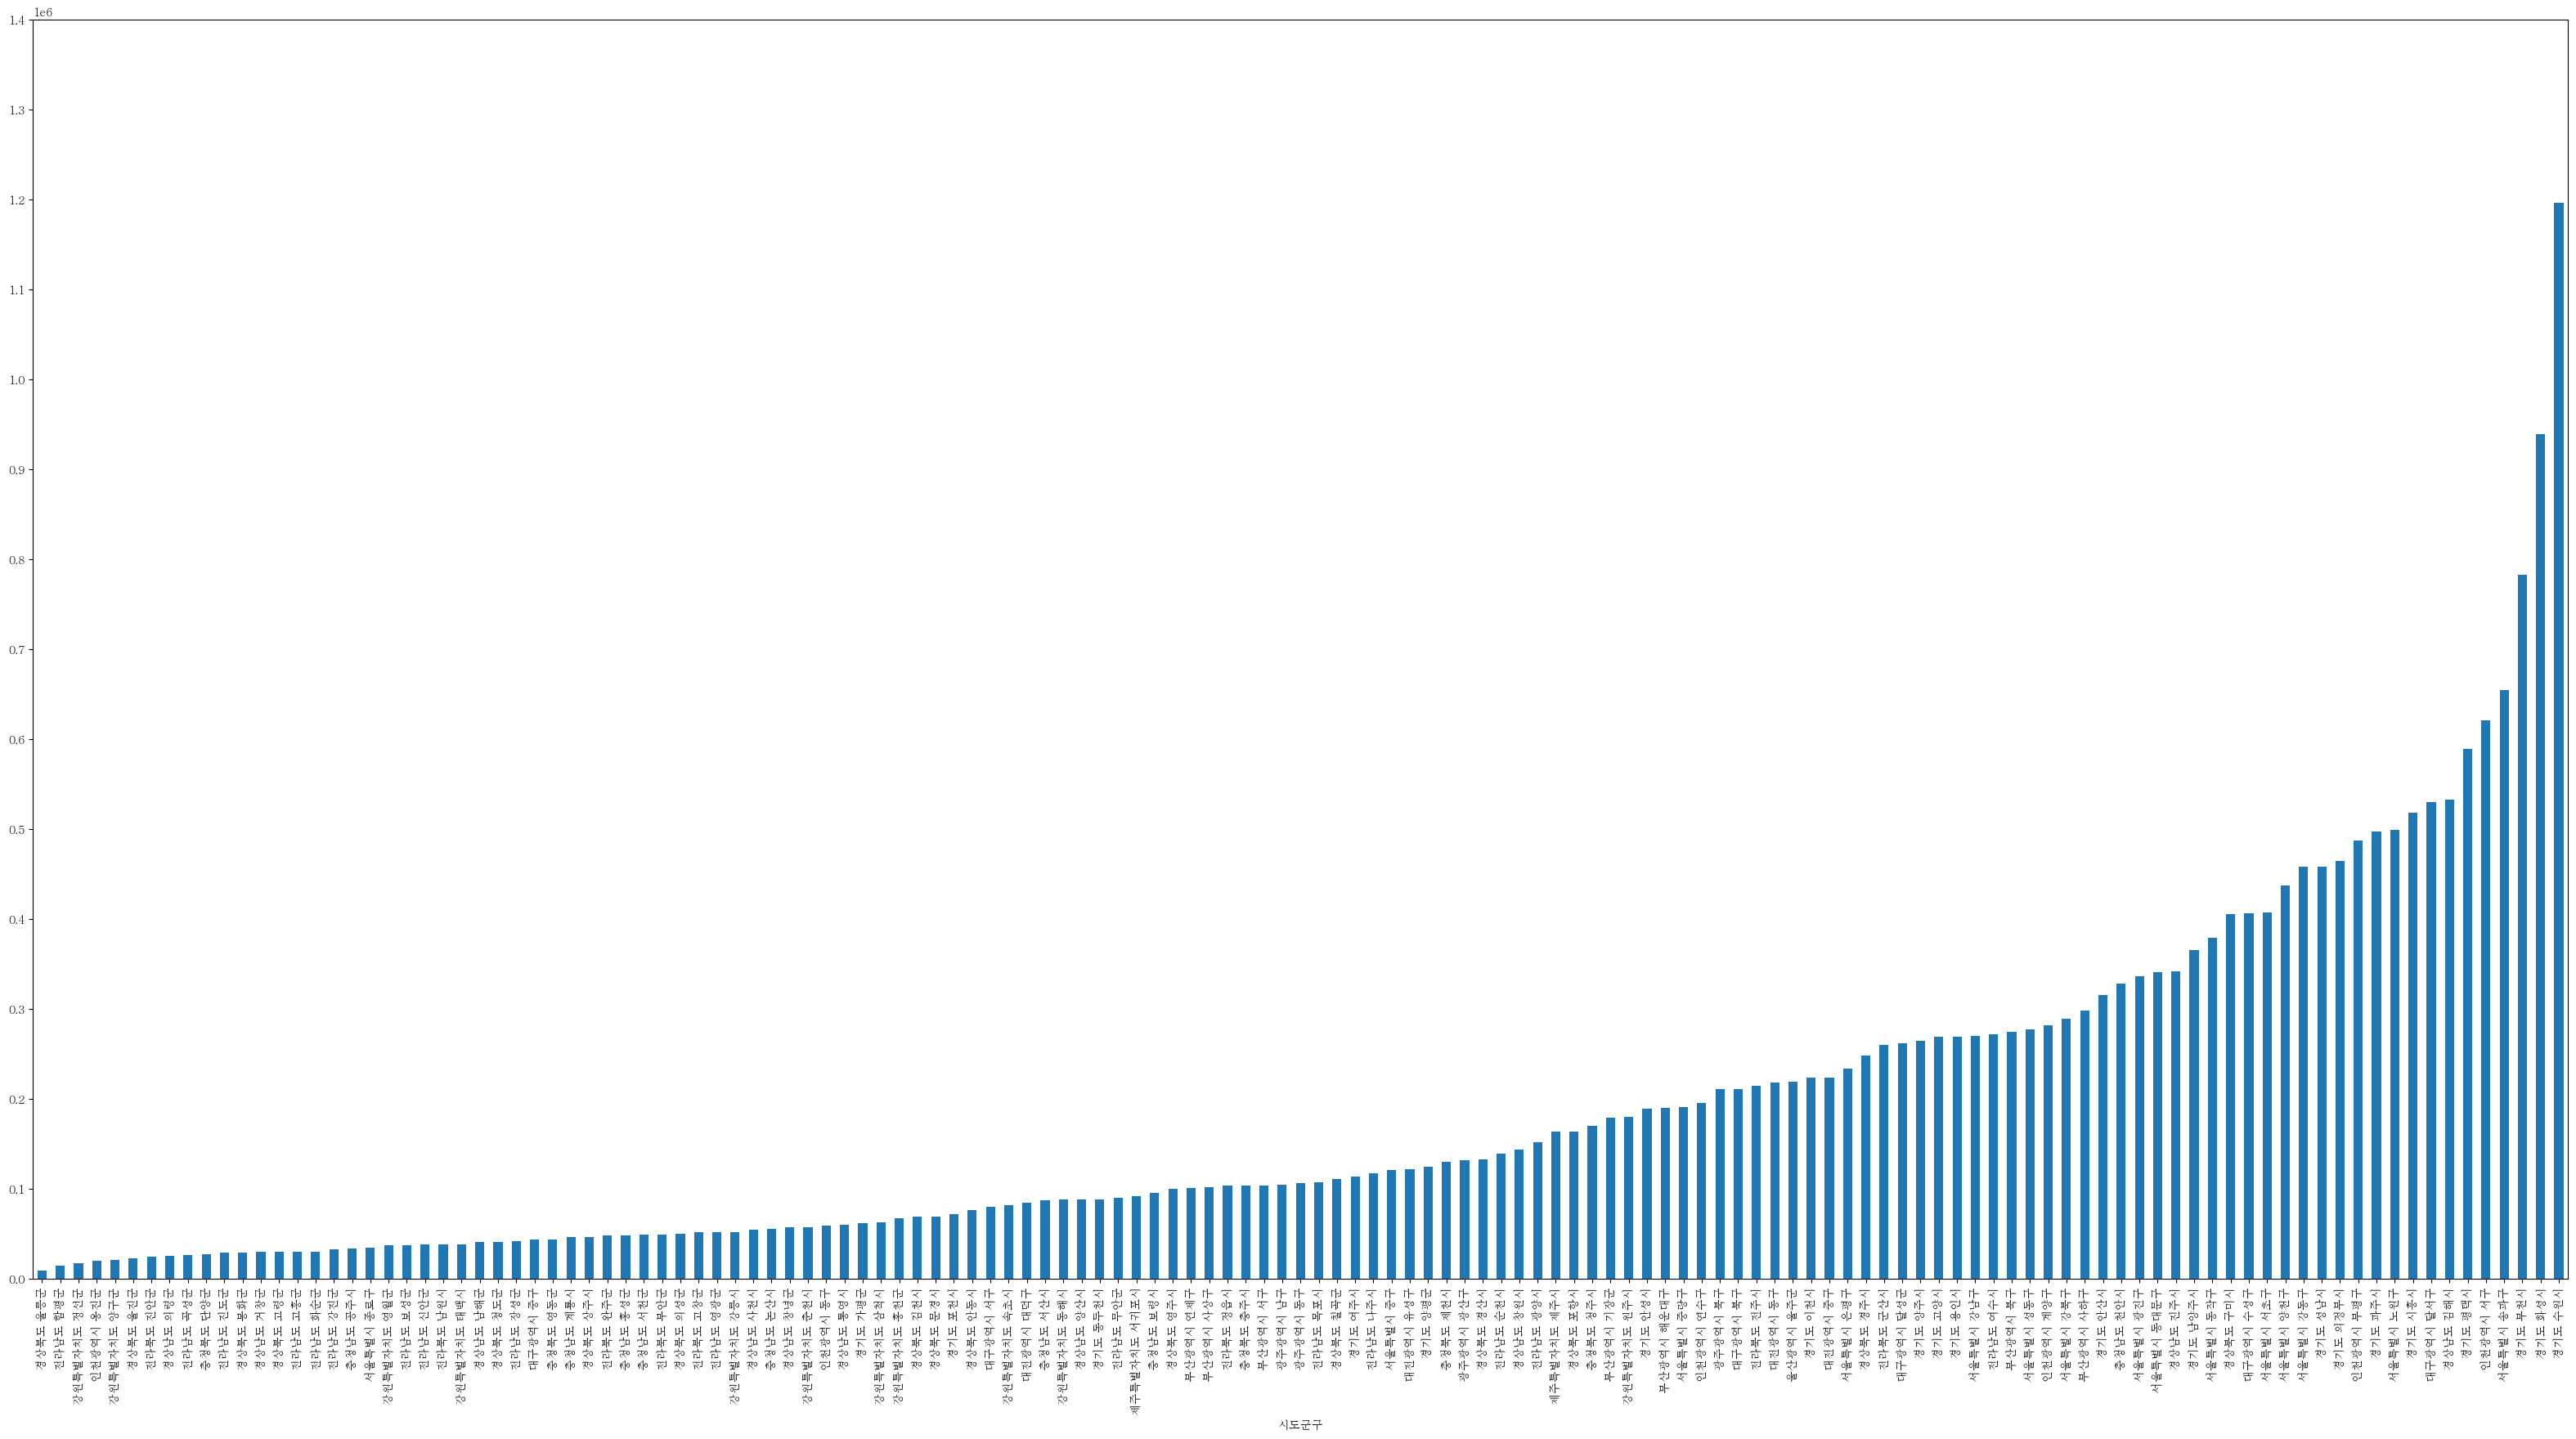

In [104]:

addr_population_merge['담당인구수'].sort_values().plot.bar(figsize=(40,20))
plt.yticks([i for i in range(0, 1500000,100000)])
plt.show()

In [ ]:
local_MC_Population = addr_population_merge[['시도_x', '군구_x','count','총인구수']]
local_MC_Population = local_MC_Population.rename(columns={"시도_x":"시도", "군구_x":"군구",\
                                                            '총인구수':'인구수'})

In [ ]:
#블록맵으로 시각화하기
data_draw_korea = pd.read_csv('./data_draw_korea.csv', index_col=0, encoding="utf-8", engine="python")
# print(data_draw_korea.head())
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r : r['광역시도'] + ' ' + r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index('시도군구')
#print(data_draw_korea.head())
#외부병합시 값이 없는 경우 'NaN'
data_all = pd.merge(data_draw_korea, local_MC_Population, how="outer", left_index=True, right_index=True)
#print(data_all.head())
#data_all = data_all.dropna(axis=0)
data_all.describe

#블록맵 행정구역 경계선 x,y 데이터
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]
#블록맵의 블록에 데이터 매핑 후 색을 표시하여 블록맵 그리는 함수
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
     
        if row.isna()[0] :
            continue
        dispname = row['shortName']
        """
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
        """       
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 7.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                      fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig('.\\ch09\\' + 'blockMap_' + targetData + '.png')
    plt.show()      

#행정구역별 공공보건의료기관 수 블록맵
draw_blockMap(data_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

#인구수 대비 공공보건의료기관 비율
draw_blockMap(data_all, "MC_ratio", "행정구역별 인구수 대비 공공보건의료기관 비율", 'Reds')